In [22]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
iris=load_iris()


In [3]:
y = iris.target
X = iris.data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [5]:
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import LinearSVC

In [6]:
LR_model = LogisticRegression()
logreg=LR_model.fit(X_train,y_train)



/Users/galeanojav/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
SVC = LinearSVC(random_state=0)
svc = SVC.fit(X_train, y_train)

/Users/galeanojav/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


The main parameter of linear models is the regularization parameter, called **C** in *LinearSVC* and *LogisticRegression*. **Small values for C mean simple models**. Usually C is searched for on a logarithmic scale. The other decision you have to make is whether you want to use L1 regularization or L2 regularization. If you assume that only a few of your features are actually important, you should use L1. Otherwise, you should default to L2. L1 can also be useful if interpretability of the model is important. As L1 will use only a few features, it is easier to explain which features are important to the model, and what the effects of these features are.

In [8]:
print("Accuracy on training set: {:.3f}".format(logreg.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(logreg.score(X_test, y_test)))


Accuracy on training set: 0.982
Accuracy on test set: 0.974


In [9]:
logreg100=LogisticRegression(C=100).fit(X_train,y_train)

print("Accuracy on training set: {:.3f}".format(logreg100.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(logreg100.score(X_test, y_test)))



Accuracy on training set: 0.991
Accuracy on test set: 0.974


/Users/galeanojav/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
logreg01=LogisticRegression(C=0.1).fit(X_train,y_train)

print("Accuracy on training set: {:.3f}".format(logreg01.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(logreg01.score(X_test, y_test)))


Accuracy on training set: 0.929
Accuracy on test set: 0.921


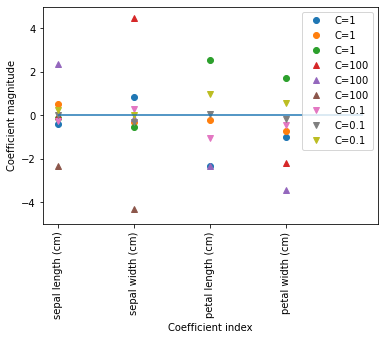

In [11]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg01.coef_.T, 'v', label="C=0.1")
plt.xticks(range(iris.data.shape[1]), iris.feature_names, rotation=90)
plt.hlines(0, 0, iris.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

Training accuracy of l1 logreg with C=0.001: 0.33
Test accuracy of l1 logreg with C=0.001: 0.34
Training accuracy of l1 logreg with C=1.000: 0.97
Test accuracy of l1 logreg with C=1.000: 0.89
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.97


/Users/galeanojav/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


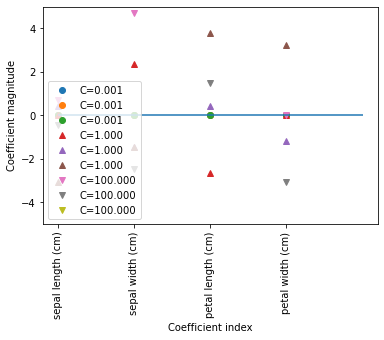

In [20]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(solver='liblinear',C=C, penalty="l1").fit(X_train, y_train) 
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(iris.data.shape[1]), iris.feature_names, rotation=90)
plt.hlines(0, 0, iris.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5, 5)
plt.legend(loc=3)

In [13]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

In [41]:
lr_l1.coef_

array([[ 0.68336296,  4.72133115, -6.75264702,  0.        ],
       [-0.4532086 , -2.47424393,  1.50331432, -3.05575353],
       [-9.47814858, -9.02742438, 21.00416691, 16.2763927 ]])

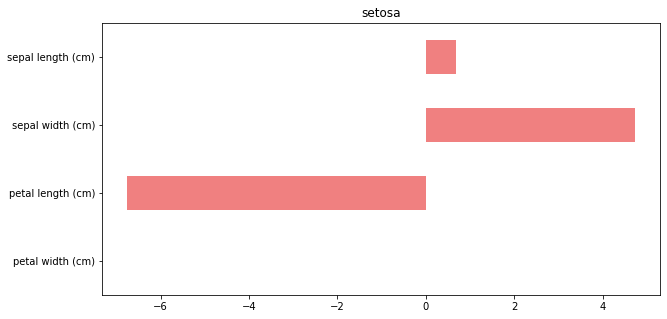

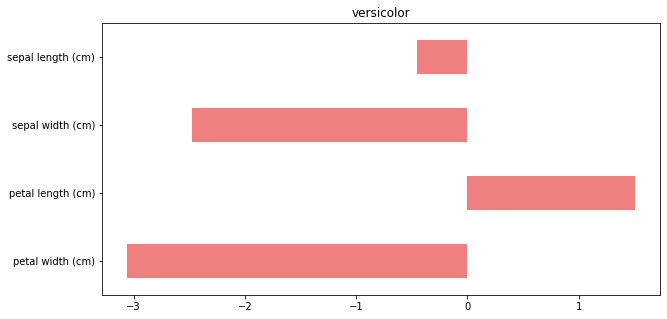

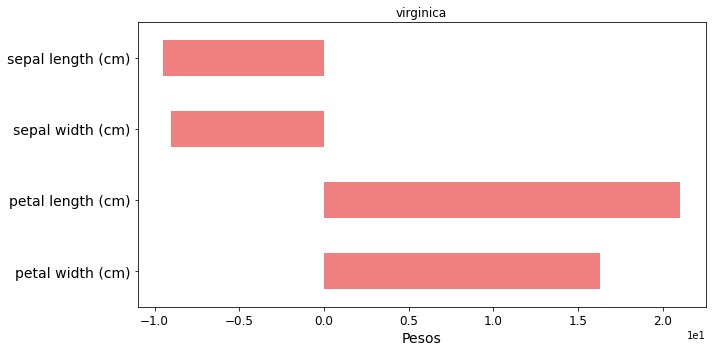

In [51]:
for i in range(len(iris.target_names)):
    plt.figure(figsize=(10,5))

    pd.Series(lr_l1.coef_[i], index=iris.feature_names).iloc[::-1].plot(kind='barh', color='lightcoral')
    plt.title(iris.target_names[i])

ax=plt.gca()
ax.set_xlabel('Pesos', fontsize=14)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
plt.tight_layout()
#plt.savefig('fistye_LR_heces.png', dpi=500)
plt.show()

In [50]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']